In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#讀進鳶尾花data
iris = datasets.load_iris()

In [3]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))

target_names: ['setosa' 'versicolor' 'virginica']


In [4]:
y = pd.DataFrame(iris['target'], columns=['target'])
print(y)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


In [6]:
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(5)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#將訓練資料以7:3分
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
#將Train以及Test的特徵標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC

In [11]:
#建立SVM模型
svm = SVC(kernel='linear', probability=True)

In [12]:
#訓練
svm.fit(X_train_std,y_train['target'].values)

SVC(kernel='linear', probability=True)

In [13]:
#預測
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [14]:
#原始答案
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [15]:
#檢查有沒有錯
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [16]:
svm.predict_proba(X_test_std)

array([[0.95120703, 0.04879297],
       [0.00870974, 0.99129026],
       [0.97435609, 0.02564391],
       [0.00753061, 0.99246939],
       [0.01910426, 0.98089574],
       [0.12838189, 0.87161811],
       [0.98454154, 0.01545846],
       [0.00565212, 0.99434788],
       [0.01004925, 0.98995075],
       [0.01776494, 0.98223506],
       [0.02715053, 0.97284947],
       [0.03352814, 0.96647186],
       [0.0093454 , 0.9906546 ],
       [0.9807638 , 0.0192362 ],
       [0.96330655, 0.03669345],
       [0.94377596, 0.05622404],
       [0.98840531, 0.01159469],
       [0.88030035, 0.11969965],
       [0.98080674, 0.01919326],
       [0.95762734, 0.04237266],
       [0.95120703, 0.04879297],
       [0.03855877, 0.96144123],
       [0.95117129, 0.04882871],
       [0.04133832, 0.95866168],
       [0.96819283, 0.03180717],
       [0.97042338, 0.02957662],
       [0.96327944, 0.03672056],
       [0.02358778, 0.97641222],
       [0.04427723, 0.95572277],
       [0.0070227 , 0.9929773 ]])

In [17]:
from matplotlib.colors import ListedColormap
#把圖畫出來看看
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


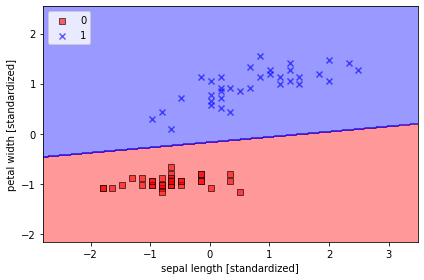

In [18]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()